### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Reading train and test datasets

In [3]:
train_df = pd.read_csv(r"train.csv",index_col=0)
train_df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True


In [4]:
test_df = pd.read_csv(r"test.csv",index_col=0)
test_df.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### shape of the Dataset

In [5]:
print("No. of rows: ", train_df.shape[0])
print("No. of columns: ", train_df.shape[1])

No. of rows:  8693
No. of columns:  13


#### The training dataset contains 8693 rows and 13 columns.

In [6]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


# Performing EDA and Data cleaning

In [7]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


##### It show the summary of our train data set mean and std as Standard deviation is far for the mean so there is presence of outliers or any un usual activity is in the dataset

In [8]:
numerical_data = train_df.select_dtypes(include='float64')
num_cols = numerical_data.columns
print("Numerical columns: ", num_cols)

Numerical columns:  Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')


In [9]:
categorical_data = train_df.select_dtypes(exclude='number')
cat_cols = categorical_data.columns
print("Categorical columns: ", cat_cols)

Categorical columns:  Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name',
       'Transported'],
      dtype='object')


# Graphical representation of train data

## Graphical analysis(Barplot)  of categorical data

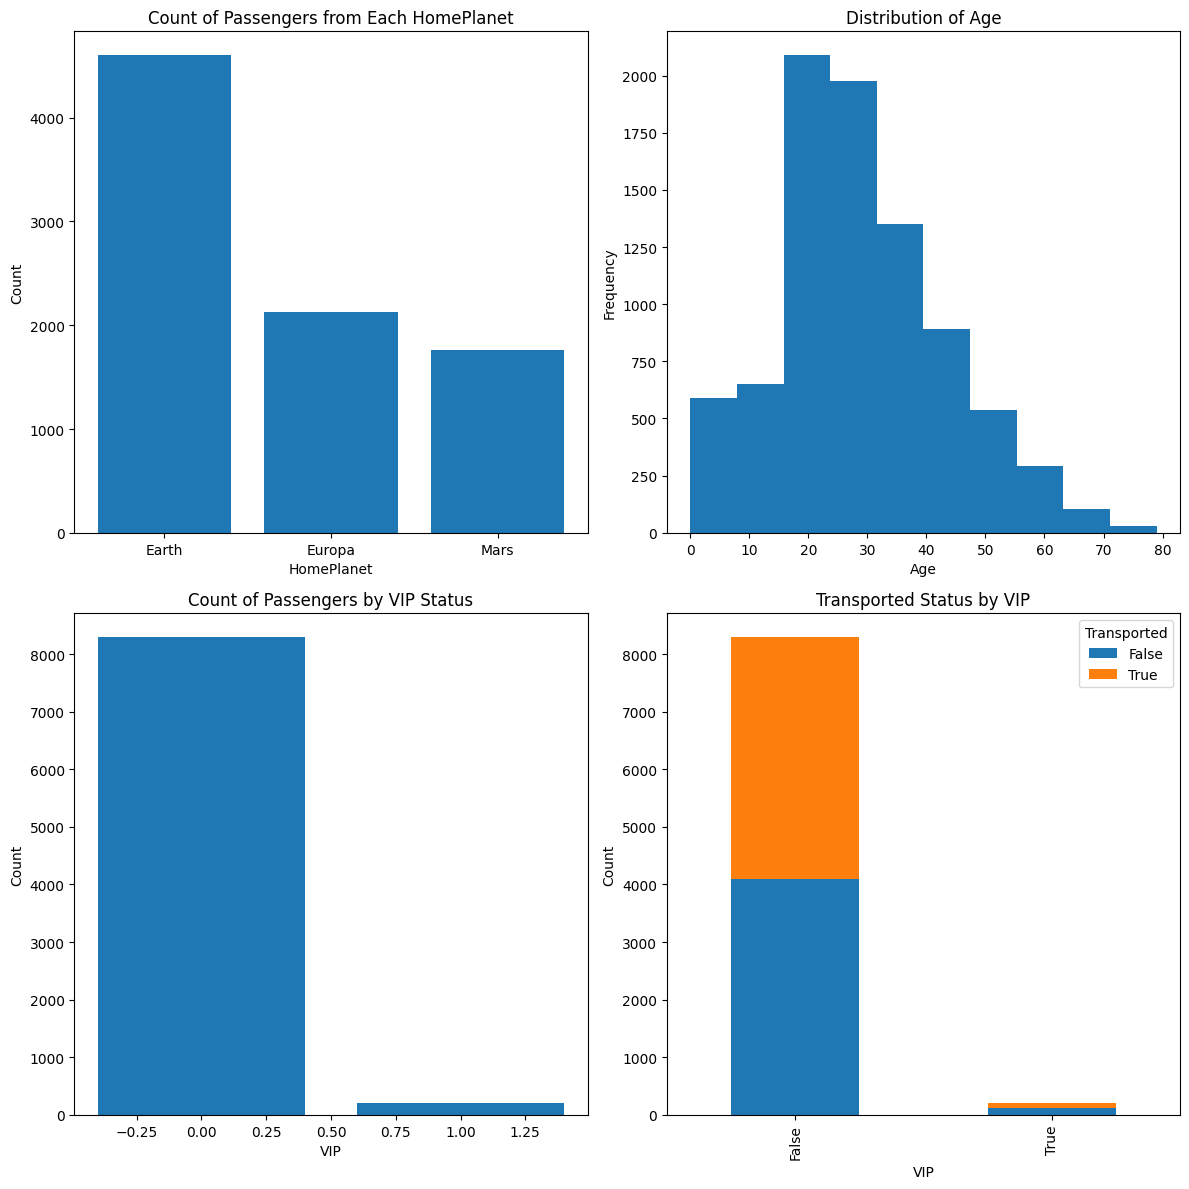

In [10]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Count of passengers from each HomePlanet
axes[0, 0].bar(train_df['HomePlanet'].value_counts().index, train_df['HomePlanet'].value_counts())
axes[0, 0].set_title('Count of Passengers from Each HomePlanet')
axes[0, 0].set_xlabel('HomePlanet')
axes[0, 0].set_ylabel('Count')

# Histogram Distribution of Age
axes[0, 1].hist(train_df['Age'], bins=10)
axes[0, 1].set_title('Distribution of Age')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')

# Count of passengers for each VIP status
axes[1, 0].bar(train_df['VIP'].value_counts().index, train_df['VIP'].value_counts())
axes[1, 0].set_title('Count of Passengers by VIP Status')
axes[1, 0].set_xlabel('VIP')
axes[1, 0].set_ylabel('Count')

# Distribution of Transported status by VIP
transported_by_vip = train_df.groupby('VIP')['Transported'].value_counts().unstack()
transported_by_vip.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Transported Status by VIP')
axes[1, 1].set_xlabel('VIP')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title='Transported', loc='upper right')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


# Graphical representation of Test data

### Bar Plot

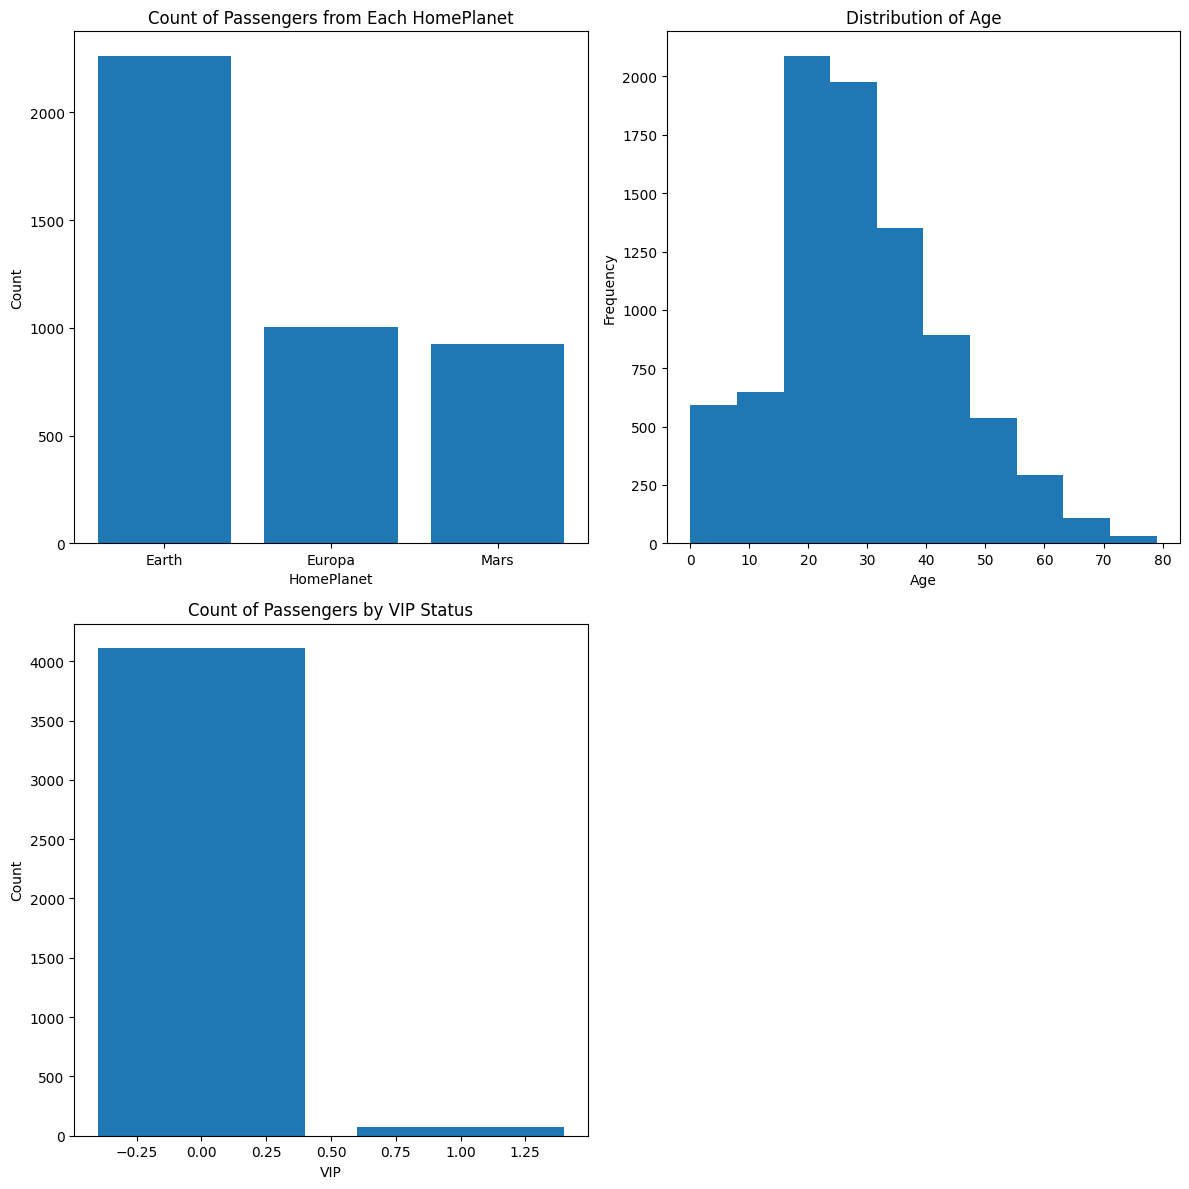

In [11]:
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Count of passengers from each HomePlanet
axes[0, 0].bar(test_df['HomePlanet'].value_counts().index, test_df['HomePlanet'].value_counts())
axes[0, 0].set_title('Count of Passengers from Each HomePlanet')
axes[0, 0].set_xlabel('HomePlanet')
axes[0, 0].set_ylabel('Count')

# Histogram Distribution of Age
axes[0, 1].hist(train_df['Age'], bins=10)
axes[0, 1].set_title('Distribution of Age')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')

# Count of passengers for each VIP status
axes[1, 0].bar(test_df['VIP'].value_counts().index, test_df['VIP'].value_counts())
axes[1, 0].set_title('Count of Passengers by VIP Status')
axes[1, 0].set_xlabel('VIP')
axes[1, 0].set_ylabel('Count')

# Remove empty subplot
fig.delaxes(axes[1, 1])

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


As you can see there is skewness and data is not normally distributed it is mainly due to present of outliers in the dataset or mainly due to non linear relationship between variables

# correlation analysis

In [12]:
#Check correlation of numerical features with the target variable.
train_df.select_dtypes(exclude = ["object"]).corr()['Transported'].sort_values(ascending=False)

Transported     1.000000
FoodCourt       0.046566
ShoppingMall    0.010141
Age            -0.075026
VRDeck         -0.207075
Spa            -0.221131
RoomService    -0.244611
Name: Transported, dtype: float64

There is a very weak positive correlation between "FoodCourt" and "Transported," suggesting a slight tendency for people who are more likely to use transportation to also visit the food court.

There is a very weak positive correlation between "ShoppingMall" and "Transported," indicating a minor association between using transportation and visiting the shopping mall.

There is a negative correlation between "Age" and "Transported," suggesting a slight tendency for younger individuals to use transportation more frequently than older individuals.

There is a moderately negative correlation between "VRDeck" and "Transported," indicating a moderate tendency for people who use transportation less often to also visit the virtual reality deck less frequently.

There is a moderately negative correlation between "Spa" and "Transported," suggesting that individuals who use transportation less frequently might also visit the spa less often.

There is a moderately negative correlation between "RoomService" and "Transported," indicating a moderate tendency for people who use transportation less frequently to also use room service less often.

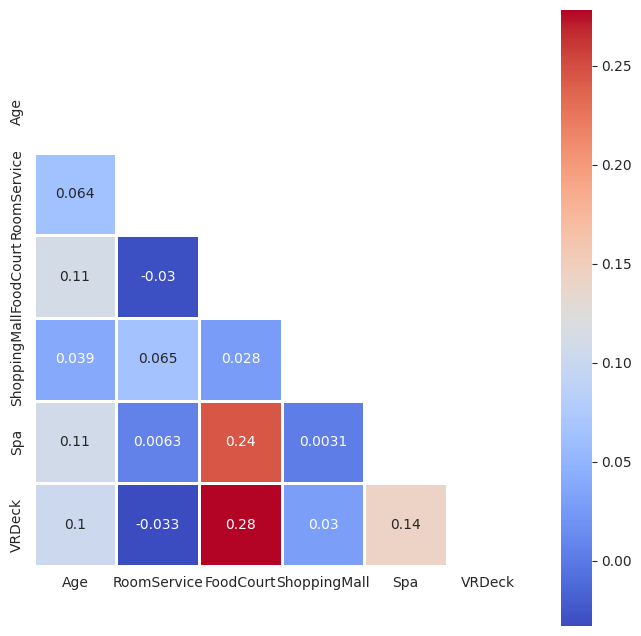

In [13]:
corr = test_df.corr()
mask = np.zeros_like(corr) # zeros matrix fill the cells with 0.
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="coolwarm", annot=True)

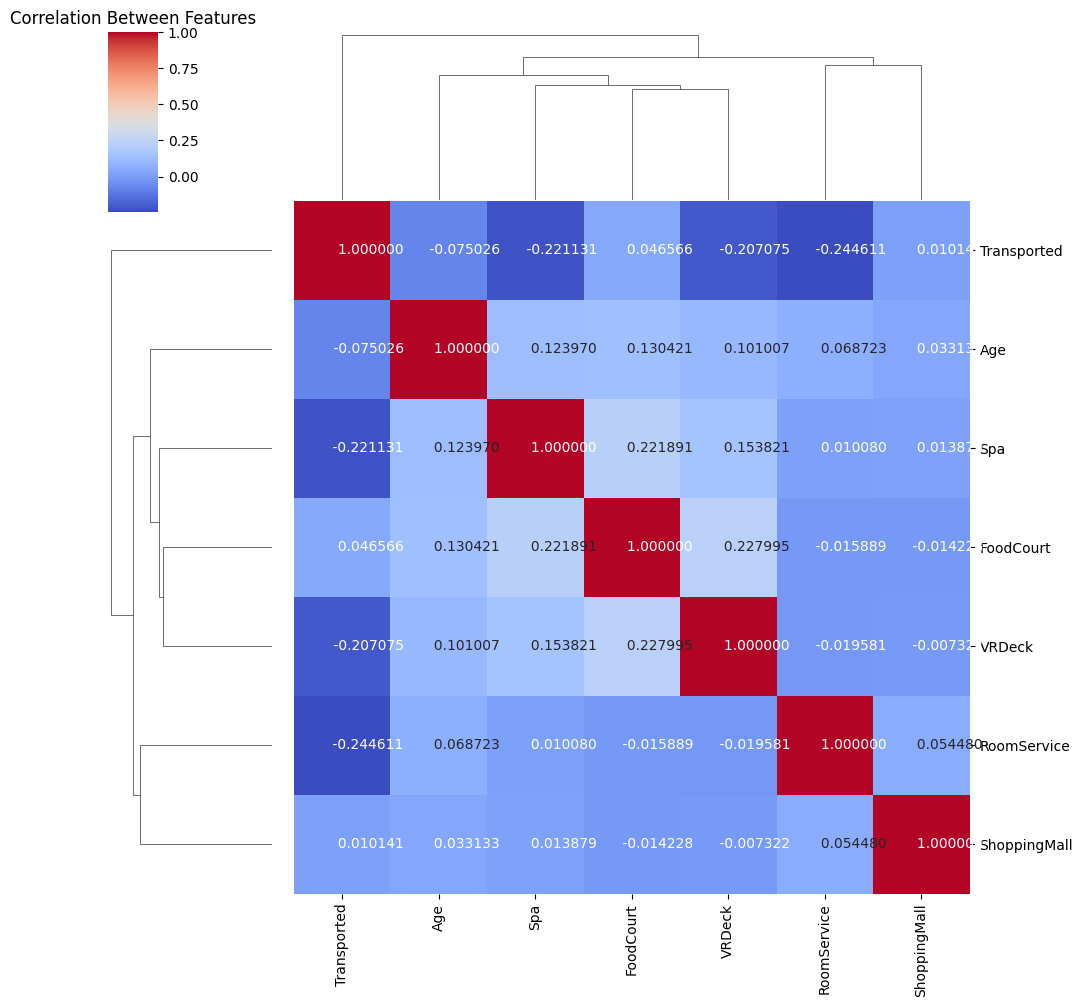

In [14]:
sns.clustermap(train_df.corr(), annot = True, fmt = "21f", cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

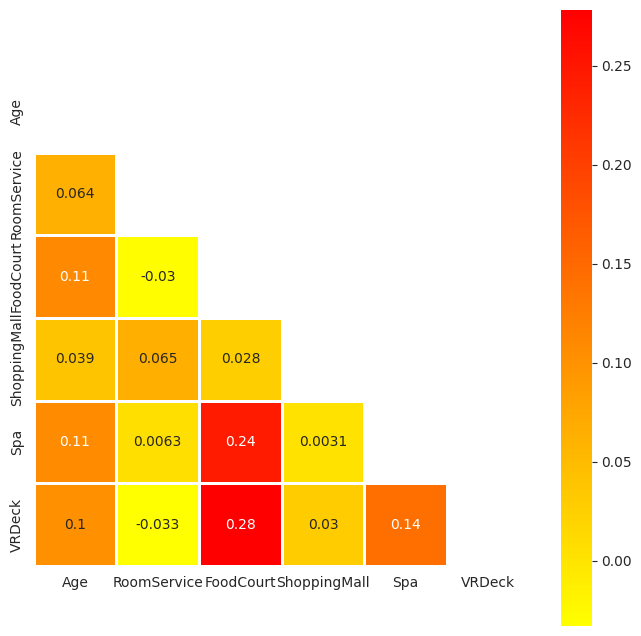

In [15]:
corr = test_df.corr()
mask = np.zeros_like(corr) # zeros matrix fill the cells with 0.
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="autumn_r", annot=True)


# Filling Nan and Null Values

## Train Data

### Graphically visualization of how much missing values are in training dataset in each column before filling the nan values

In [16]:
import plotly.express as px

missing=(train_df.isnull().mean().sort_values(ascending=False)*100).reset_index()
missing.rename(columns={0:"Average"},inplace=True)
missing.head()
fig=px.histogram(missing,x="Average",y="index",title="<b>% of Missing values",color="index",labels={"Average":"%age of missing values","index":"Column Names"})
fig.update_layout(
    font_color="white",
    font_size=12,
    title_font_color="cyan",
    legend_title_font_color="white",
    legend_title_font_size=20,
    template="plotly_dark",
    title_font_size=30
)
fig.update_layout(xaxis_title = "<b>Amount in %age",xaxis_title_font_size=20,
                  yaxis_title="<b>Column-Name",yaxis_title_font_size=20,title_x=0.5)
fig.show()


#### We have to fill these null values with the column mean if the column is numeric if the column is catagorical than we have to fill it with most frequent word (mode)

In [17]:
#filling  missing values with mean for numerical columns
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df_filled = train_df.copy()

for column in numerical_columns:
    mean = train_df[column].mean()
    df_filled[column].fillna(mean, inplace=True)

#Filling missing values with mode for boolean columns
boolean_columns = ['CryoSleep', 'VIP', 'Transported']
for column in boolean_columns:
    mode = train_df[column].mode().iloc[0]
    df_filled[column].fillna(mode, inplace=True)

#Replace NaN values with the mode in each categorical column
for column in ['HomePlanet', 'Cabin ', 'Destination','Name']:
    column_name = column.strip()  # Remove leading and trailing whitespace
    mode_value = df_filled[column_name].mode().iloc[0]
    df_filled[column_name].fillna(mode_value, inplace=True)

In [18]:
from scipy.stats import mstats
columns_with_outliers = ['Age','RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']

for column in columns_with_outliers:
    df_filled[column] = mstats.winsorize(df_filled[column], limits=(0, 0.05))


skewed_columns = ['RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']
for column in skewed_columns:
    if df_filled[column].min() > 0:  #Ensure positive values for log transformation
         df_filled[column] = np.log1p(df_filled[column])

from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='normal')
df_filled[skewed_columns] = quantile_transformer.fit_transform(df_filled[skewed_columns])
df_filled

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,0.713948,0.457033,0.611996,1.120145,0.621099,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,55.0,True,0.618059,5.199338,-5.199338,5.199338,0.630254,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,-5.199338,1.364541,1.106999,5.199338,0.814695,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,0.947973,0.619578,0.838072,1.134884,0.391137,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,-5.199338,5.199338,-5.199338,5.199338,0.680013,Gravior Noxnuther,False
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,Kurta Mondalley,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,-5.199338,-5.199338,5.199338,0.307111,-5.199338,Fayey Connon,True


In [19]:
df_filled.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

As you can see there is no nan and null values

#### We have to identify the numerical columns to draw boxplot

In [20]:
numerical_data = df_filled.select_dtypes(include='float64')
num_cols = numerical_data.columns
print("Numerical columns: ", num_cols)

Numerical columns:  Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')


# Data visualization using boxplot
### We have to identify the columns which has outliers so we will draw boxlot in order to identify

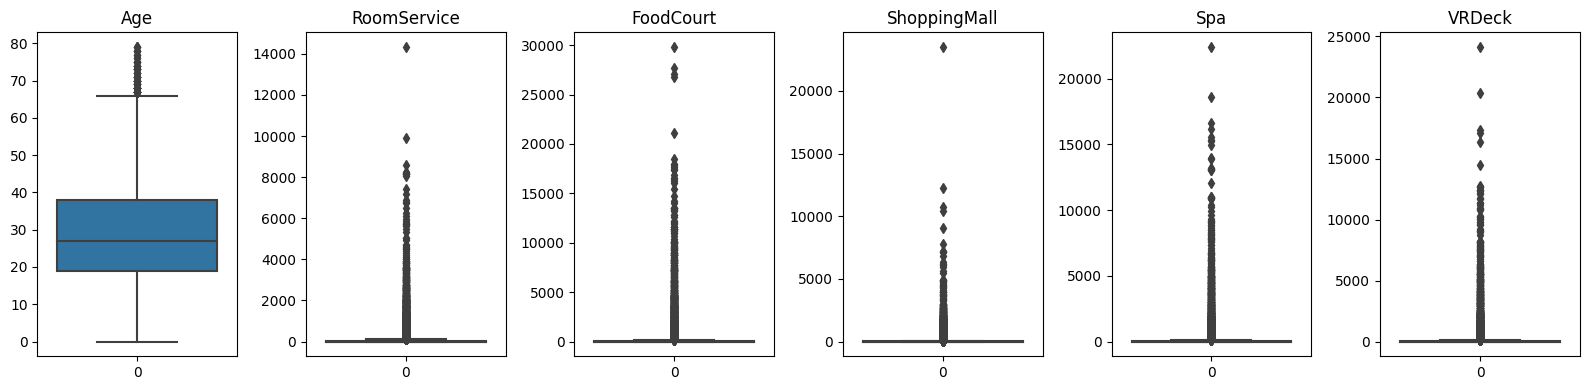

In [21]:
x = 0
plt.figure(figsize=(16, 4))
for i in train_df.select_dtypes("number"):
    x += 1
    plt.subplot(1, 6, x)
    sns.boxplot(data=train_df[i])
    plt.title(i)
    plt.tight_layout()
plt.show()

##### We can see that 'Age', 'RoomService',  'FoodCourt',  'ShoppingMall', 'Spa' and 'VRDeck' has outliers so we have to remove it

In [22]:
from scipy.stats import mstats
columns_with_outliers = ['Age','RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']

for column in columns_with_outliers:
    numerical_data[column] = mstats.winsorize(numerical_data[column], limits=(0, 0.05))


skewed_columns = ['RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']
for column in skewed_columns:
    if numerical_data[column].min() > 0:  #Ensure positive values for log transformation
         numerical_data[column] = np.log1p(numerical_data[column])

from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='normal')
numerical_data[skewed_columns] = quantile_transformer.fit_transform(numerical_data[skewed_columns])


##### To remove outliers we use winsorize and there is also column which show skeweness you can see the skewness in the above graph so we have to use loglp and try to make normal distribution

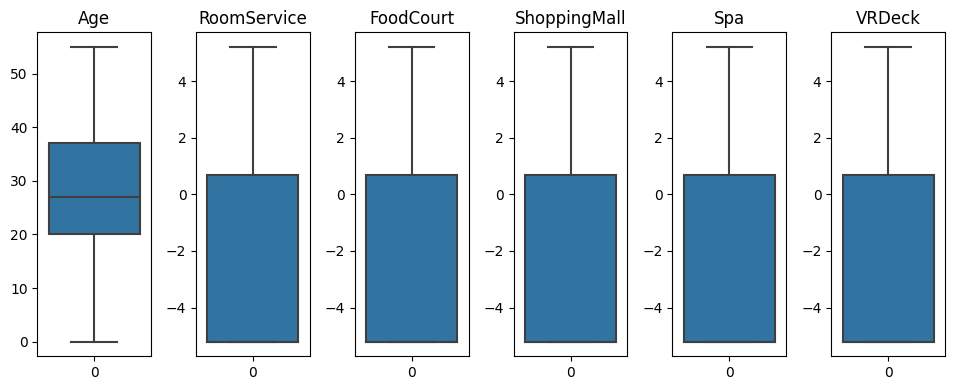

In [23]:
x = 0
plt.figure(figsize=(16, 4))
for i in numerical_data.select_dtypes("number"):
    x += 1
    plt.subplot(1, 10, x)
    sns.boxplot(data=numerical_data[i])
    plt.title(i)
    plt.tight_layout()
plt.show()

In [24]:
combined_data = pd.concat([numerical_data, categorical_data], axis=1)
for column in ['HomePlanet', 'Cabin ', 'Destination','Name']:
    column_name = column.strip()  # Remove leading and trailing whitespace
    mode_value = combined_data[column_name].mode().iloc[0]
    combined_data[column_name].fillna(mode_value, inplace=True)
boolean_columns = ['CryoSleep', 'VIP', 'Transported']
for column in boolean_columns:
    mode = combined_data[column].mode().iloc[0]
    combined_data[column].fillna(mode, inplace=True)
#combined_data.isna().sum()
combined_data['HomePlanet']=combined_data['HomePlanet'].map({'Europa': 1, 'Earth': 2, 'Mars': 3})
combined_data['CryoSleep']=combined_data['CryoSleep'].map({False: 0, True: 1})
combined_data['Destination']=combined_data['Destination'].map({'TRAPPIST-1e': 1, '55 Cancri e': 2, 'PSO J318.5-22': 3})
combined_data['VIP']=combined_data['VIP'].map({False: 0, True: 1})
combined_data['Transported']=combined_data['Transported'].map({False: 0, True: 1})

# Test data

### Graphically visualization of how much missing values are in testing dataset in each column before filling the nan values

In [25]:
import plotly.express as px

missing=(test_df.isnull().mean().sort_values(ascending=False)*100).reset_index()
missing.rename(columns={0:"Average"},inplace=True)
missing.head()
fig=px.histogram(missing,x="Average",y="index",title="<b>% of Missing values",color="index",labels={"Average":"%age of missing values","index":"Column Names"})
fig.update_layout(
    font_color="white",
    font_size=12,
    title_font_color="cyan",
    legend_title_font_color="white",
    legend_title_font_size=20,
    template="plotly_dark",
    title_font_size=30
)
fig.update_layout(xaxis_title = "<b>Amount in %age",xaxis_title_font_size=20,
                  yaxis_title="<b>Column-Name",yaxis_title_font_size=20,title_x=0.5)
fig.show()


#### We have to fill these null values with the column mean if the column is numeric if the column is catagorical than we have to fill it with most frequent word (mode)

In [26]:
#Fill missing values with mean for numerical columns
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df_filled_test = test_df.copy()

for column in numerical_columns:
    mean = test_df[column].mean()
    df_filled_test[column].fillna(mean, inplace=True)

# Fill missing values with mode for boolean columns
boolean_columns = ['CryoSleep', 'VIP']
for column in boolean_columns:
    mode = test_df[column].mode().iloc[0]
    df_filled_test[column].fillna(mode, inplace=True)

# Replace NaN values with the mode in each categorical column
for column in ['HomePlanet', 'Cabin ', 'Destination','Name']:
    column_name = column.strip()  # Remove leading and trailing whitespace
    mode_value = df_filled_test[column_name].mode().iloc[0]
    df_filled_test[column_name].fillna(mode_value, inplace=True)

In [27]:
from scipy.stats import mstats
columns_with_outliers = ['Age','RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']

for column in columns_with_outliers:
    df_filled_test[column] = mstats.winsorize(df_filled_test[column], limits=(0, 0.05))


skewed_columns = ['RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']
for column in skewed_columns:
    if df_filled_test[column].min() > 0:  #Ensure positive values for log transformation
         df_filled_test[column] = np.log1p(df_filled_test[column])

from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='normal')
df_filled_test[skewed_columns] = quantile_transformer.fit_transform(df_filled_test[skewed_columns])
df_filled_test

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.000000,False,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.000000,False,-5.199338,0.455640,-5.199338,5.199338,-5.199338,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.000000,False,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.000000,False,-5.199338,5.199338,-5.199338,0.784093,1.204935,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.000000,False,0.493553,-5.199338,1.303074,-5.199338,-5.199338,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,False,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,Jeron Peter
9269_01,Earth,False,G/160/P,TRAPPIST-1e,42.000000,False,-5.199338,1.238173,0.559621,0.452858,0.819373,Matty Scheron
9271_01,Mars,True,D/296/P,55 Cancri e,28.658146,False,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,Jayrin Pore


In [28]:
 df_filled_test.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

As you can see all the null and nan values are remove

#### We have to identify the numerical columns to draw boxplot

In [29]:
numerical_data1 = df_filled_test.select_dtypes(include='float64')
num_cols = numerical_data.columns
print("Numerical columns: ", num_cols)

Numerical columns:  Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')


#### We have to identify the columns which has outliers so we will draw boxlot in order to identify

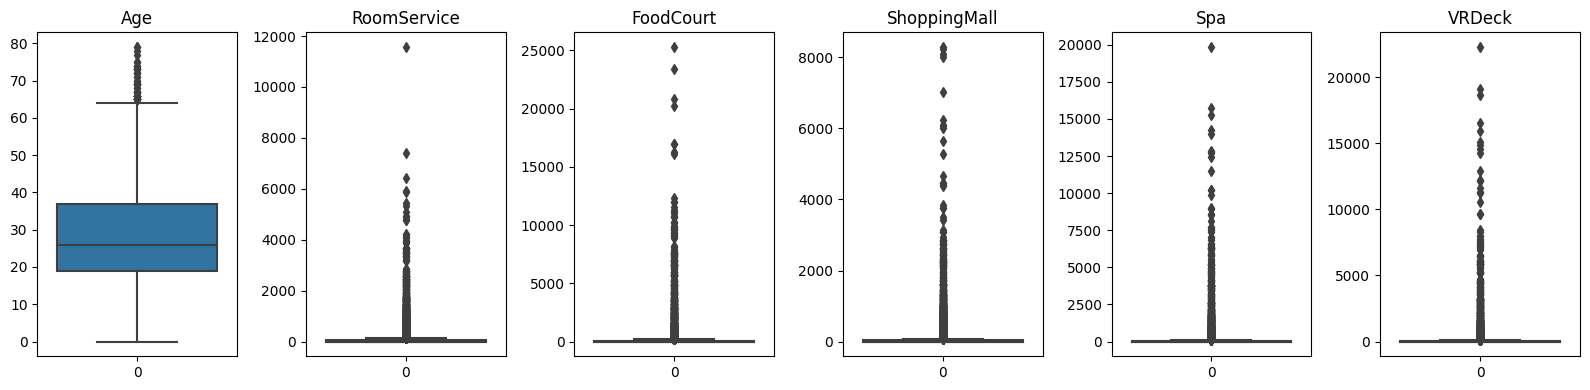

In [30]:
# For test
x = 0
plt.figure(figsize=(16, 4))
for i in test_df.select_dtypes("number"):
    x += 1
    plt.subplot(1, 6, x)
    sns.boxplot(data=test_df[i])
    plt.title(i)
    plt.tight_layout()
plt.show()

#### We can see that 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa' and 'VRDeck' has outliers so we have to remove it

In [31]:
from scipy.stats import mstats
columns_with_outliers = ['Age','RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']

for column in columns_with_outliers:
    numerical_data1[column] = mstats.winsorize(numerical_data1[column], limits=(0, 0.05))


skewed_columns = ['RoomService', 'FoodCourt','ShoppingMall','Spa','VRDeck']
for column in skewed_columns:
    if numerical_data1[column].min() > 0:  #Ensure positive values for log transformation
         numerical_data1[column] = np.log1p(numerical_data1[column])

from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='normal')
numerical_data1[skewed_columns] = quantile_transformer.fit_transform(numerical_data1[skewed_columns])


#### To remove outliers we use winsorize and there is also column which show skeweness you can see the skewness in the above graph so we have to use loglp and try to make normal distribution

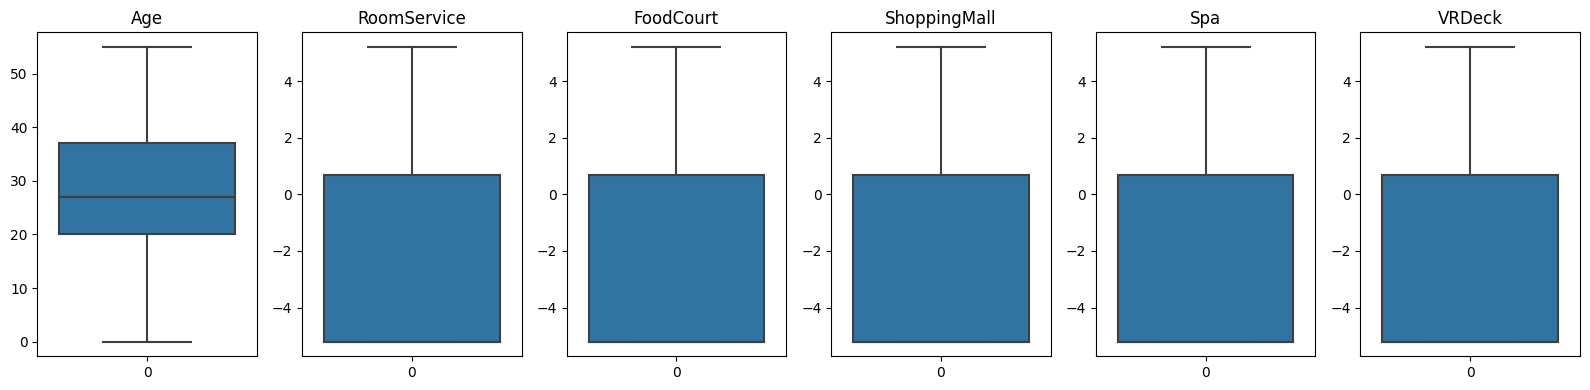

In [32]:
x = 0
plt.figure(figsize=(16, 4))
for i in numerical_data1.select_dtypes("number"):
    x += 1
    plt.subplot(1, 6, x)
    sns.boxplot(data=numerical_data1[i])
    plt.title(i)
    plt.tight_layout()
plt.show()

# Prepare for ML

In [33]:
training=df_filled
testing=df_filled_test

In [34]:
training

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,0.713948,0.457033,0.611996,1.120145,0.621099,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,55.0,True,0.618059,5.199338,-5.199338,5.199338,0.630254,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,-5.199338,1.364541,1.106999,5.199338,0.814695,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,0.947973,0.619578,0.838072,1.134884,0.391137,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,-5.199338,5.199338,-5.199338,5.199338,0.680013,Gravior Noxnuther,False
9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,Kurta Mondalley,False
9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,-5.199338,-5.199338,5.199338,0.307111,-5.199338,Fayey Connon,True


In [35]:
testing.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

# Feature engineering of Training Data


In [36]:
print(training["HomePlanet"].unique())
print(training["CryoSleep"].unique())
print(training["Destination"].unique())
print(training["VIP"].unique())
print(training["Transported"].unique())


['Europa' 'Earth' 'Mars']
[False  True]
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
[False  True]
[False  True]


In [37]:
df=training
df['HomePlanet']=df['HomePlanet'].map({'Europa': 1, 'Earth': 2, 'Mars': 3})
df['CryoSleep']=df['CryoSleep'].map({False: 0, True: 1})
df['Destination']=df['Destination'].map({'TRAPPIST-1e': 1, '55 Cancri e': 2, 'PSO J318.5-22': 3})
df['VIP']=df['VIP'].map({False: 0, True: 1})
df['Transported']=df['Transported'].map({False: 0, True: 1})

In [38]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for feature in ['Cabin','Name']:
    df[feature]=labelencoder.fit_transform(df[feature])

In [39]:
df.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

# Feature Engineering of Testing Data

In [40]:
print(testing["HomePlanet"].unique())
print(testing["CryoSleep"].unique())
print(testing["Destination"].unique())
print(testing["VIP"].unique())


['Earth' 'Europa' 'Mars']
[ True False]
['TRAPPIST-1e' '55 Cancri e' 'PSO J318.5-22']
[False  True]


In [41]:

testing['HomePlanet']=testing['HomePlanet'].map({'Europa': 1, 'Earth': 2, 'Mars': 3})
testing['CryoSleep']=testing['CryoSleep'].map({False: 0, True: 1})
testing['Destination']=testing['Destination'].map({'TRAPPIST-1e': 1, '55 Cancri e': 2, 'PSO J318.5-22': 3})
testing['VIP']=testing['VIP'].map({False: 0, True: 1})


In [42]:
testing

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,2,1,G/3/S,1,27.000000,0,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,Nelly Carsoning
0018_01,2,0,F/4/S,1,19.000000,0,-5.199338,0.455640,-5.199338,5.199338,-5.199338,Lerome Peckers
0019_01,1,1,C/0/S,2,31.000000,0,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,Sabih Unhearfus
0021_01,1,0,C/1/S,1,38.000000,0,-5.199338,5.199338,-5.199338,0.784093,1.204935,Meratz Caltilter
0023_01,2,0,F/5/S,1,20.000000,0,0.493553,-5.199338,1.303074,-5.199338,-5.199338,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,2,1,G/1496/S,1,34.000000,0,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,Jeron Peter
9269_01,2,0,G/160/P,1,42.000000,0,-5.199338,1.238173,0.559621,0.452858,0.819373,Matty Scheron
9271_01,3,1,D/296/P,2,28.658146,0,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,Jayrin Pore


In [43]:
df_train= df.drop(['Name','Cabin'],axis=1)
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,
0001_01,1,0,1,39.0,0,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0
0002_01,2,0,1,24.0,0,0.713948,0.457033,0.611996,1.120145,0.621099,1
0003_01,1,0,1,55.0,1,0.618059,5.199338,-5.199338,5.199338,0.630254,0
0003_02,1,0,1,33.0,0,-5.199338,1.364541,1.106999,5.199338,0.814695,0
0004_01,2,0,1,16.0,0,0.947973,0.619578,0.838072,1.134884,0.391137,1
...,...,...,...,...,...,...,...,...,...,...,...
9276_01,1,0,2,41.0,1,-5.199338,5.199338,-5.199338,5.199338,0.680013,0
9278_01,2,1,3,18.0,0,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0
9279_01,2,0,1,26.0,0,-5.199338,-5.199338,5.199338,0.307111,-5.199338,1


In [44]:
testing=testing.drop(['Name','Cabin'],axis=1)
testing

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
PassengerId,,,,,,,,,,
0013_01,2,1,1,27.000000,0,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
0018_01,2,0,1,19.000000,0,-5.199338,0.455640,-5.199338,5.199338,-5.199338
0019_01,1,1,2,31.000000,0,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
0021_01,1,0,1,38.000000,0,-5.199338,5.199338,-5.199338,0.784093,1.204935
0023_01,2,0,1,20.000000,0,0.493553,-5.199338,1.303074,-5.199338,-5.199338
...,...,...,...,...,...,...,...,...,...,...
9266_02,2,1,1,34.000000,0,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
9269_01,2,0,1,42.000000,0,-5.199338,1.238173,0.559621,0.452858,0.819373
9271_01,3,1,2,28.658146,0,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338


In [45]:
testing.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

# Modeling

In [46]:
sub_df = pd.read_csv(r"sample_submission.csv",index_col=0)
sub_df=sub_df.reset_index()
# y_test=sub_df['Transported']
merged_test = pd.merge(testing, sub_df, on='PassengerId', how='inner')
merged_test.set_index('PassengerId', inplace=True)
#merged_test= merged_test.drop(['Name','Cabin'],axis=1)
merged_test


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,
0013_01,2,1,1,27.000000,0,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,False
0018_01,2,0,1,19.000000,0,-5.199338,0.455640,-5.199338,5.199338,-5.199338,False
0019_01,1,1,2,31.000000,0,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,False
0021_01,1,0,1,38.000000,0,-5.199338,5.199338,-5.199338,0.784093,1.204935,False
0023_01,2,0,1,20.000000,0,0.493553,-5.199338,1.303074,-5.199338,-5.199338,False
...,...,...,...,...,...,...,...,...,...,...,...
9266_02,2,1,1,34.000000,0,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,False
9269_01,2,0,1,42.000000,0,-5.199338,1.238173,0.559621,0.452858,0.819373,False
9271_01,3,1,2,28.658146,0,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,False


In [47]:
X_test = merged_test.drop('Transported',axis=1)

In [48]:
X_train = df_train.drop('Transported', axis=1)  # Adjust 'target_variable' to your actual target column name
y_train = df_train['Transported']


In [49]:
merged_test.to_csv("test_google.csv")
df_train.to_csv("train_google.csv")

In [50]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,
0001_01,1,0,1,39.0,0,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0
0002_01,2,0,1,24.0,0,0.713948,0.457033,0.611996,1.120145,0.621099,1
0003_01,1,0,1,55.0,1,0.618059,5.199338,-5.199338,5.199338,0.630254,0
0003_02,1,0,1,33.0,0,-5.199338,1.364541,1.106999,5.199338,0.814695,0
0004_01,2,0,1,16.0,0,0.947973,0.619578,0.838072,1.134884,0.391137,1
...,...,...,...,...,...,...,...,...,...,...,...
9276_01,1,0,2,41.0,1,-5.199338,5.199338,-5.199338,5.199338,0.680013,0
9278_01,2,1,3,18.0,0,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0
9279_01,2,0,1,26.0,0,-5.199338,-5.199338,5.199338,0.307111,-5.199338,1


## Support Vector Machines

In [51]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred2 = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

74.59

## Random Forest

In [52]:
random_forest = RandomForestClassifier(max_depth= 5, min_samples_leaf=4, min_samples_split=5, n_estimators= 200)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

78.94

## Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=10, penalty='l1', solver='liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(logreg.score(X_train, y_train) * 100, 2)
print("Accuracy (Logistic Regression):", acc_logreg)


Accuracy (Logistic Regression): 75.05


In [66]:
sub=pd.DataFrame({'Transported':Y_pred.astype(bool)},index=test_df.index)

In [67]:
sub

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,False
...,...
9266_02,True
9269_01,False
9271_01,True


# submission.csv

In [68]:
sub.to_csv("final_submission.csv")

 # Shap

In [58]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 12.2 MB/s eta 0:00:00


In [59]:
import shap
shap.initjs()

In [60]:
X_test_np = np.array(X_test)

In [61]:
explainer = shap.Explainer(random_forest)
shap_values = explainer.shap_values(X_test_np)


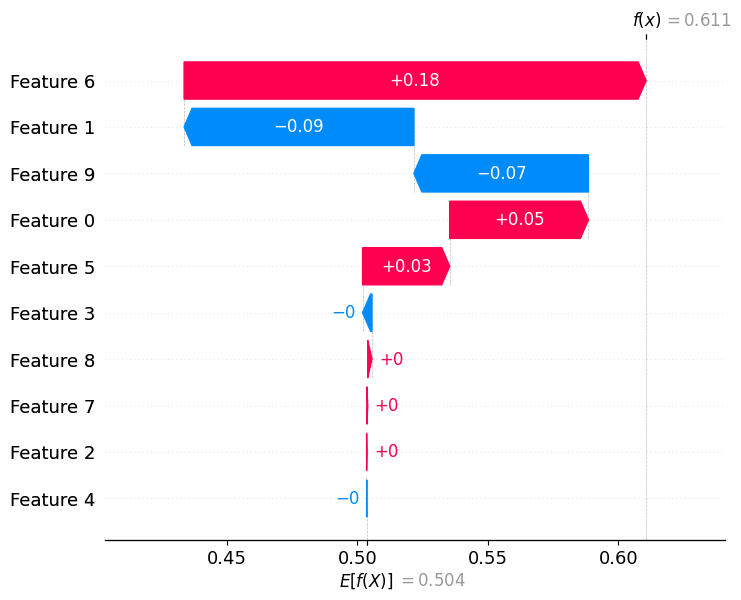

In [65]:
# import shap

# # Assuming shap_values is a matrix of explanations with shape (num_samples, num_features)
# shap_values_single = shap_values[1]  # Selecting the explanations for a specific sample

# # Create an Explanation object with the selected values and expected base values
# explanation = shap.Explanation(values=shap_values_single, base_values=explainer.expected_value[1])

# # Plot the waterfall plot for the single explanation
# shap.waterfall_plot(explanation, max_display=10)


import shap

# Assuming shap_values is a matrix of explanations with shape (num_samples, num_features)
shap_values_single = shap_values[1]  # Selecting the explanations for a specific sample

# Create an Explanation object with the selected values and expected base values
explanation = shap.Explanation(values=shap_values_single, base_values=explainer.expected_value[1])
idx=3
# Plot the waterfall plot for the single explanation
shap.waterfall_plot(explanation[idx], max_display=10)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 10]
}

grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)
svc_best = SVC(**best_params)
svc_best.fit(X_train, y_train)
y_pred = svc_best.predict(X_test)
acc_svc = round(svc_best.score(X_train, y_train) * 100, 2)
print("Accuracy (SVC):", acc_svc)
